<a href="https://colab.research.google.com/github/walaabouzar/Classification-de-Produits-par-R-gression-Logistique-R-gularis-e/blob/main/regularisation_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Regression logistique avec régularisation
 nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un produit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [ ]:
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [ ]:
# Proba combinatoire pour calculer le nombre de caracteristiques via le coefficient binomial

In [ ]:
def mapping(X, degree=7):
    """
    Étend les features X en une représentation polynomiale jusqu'au degré spécifié.

    Paramètres :
    - X : ndarray de forme (m, 3), avec colonne de biais en X[:,0]
    - degree : degré de transformation polynomiale

    Retour :
    - outX : ndarray de forme (m, n_features_polynomiales)
    """
    m = X.shape[0]
    n_cols = sum(range(degree + 1))  # nombre total de colonnes pour le degré donné
    outX = np.ones((m, n_cols))

    X1 = X[:, 1]
    X2 = X[:, 2]

    k = 0
    for i in range(degree):
        for j in range(i + 1):
            outX[:, k] = np.power(X1, i - j) * np.power(X2, j)
            k += 1
    return outX


In [ ]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));


1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostReg(X, y, theta):
    """
    Calcule le coût régularisé pour la régression logistique.

    Paramètres:
    X : ndarray (m, n+1) - Matrice des features (avec colonne de biais).
    y : ndarray (m, 1)   - Vecteur des étiquettes (0 ou 1).
    theta : ndarray (n+1, 1) - Paramètres du modèle.
    lambda_ : float - Paramètre de régularisation (défaut: 0.1).

    Retourne:
    float - Valeur du coût J.
    """

    m = len(y)
    h = Sigmoid(X @ theta)


    cost = (-1/m) * (y.T @ np.log(h + 1e-10) + (1 - y).T @ np.log(1 - h + 1e-10))

    reg = (lambdaa / (2*m)) * np.sum(theta[1:]**2)

    J = cost + reg
    return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    """
    Descente de gradient régularisée pour la régression logistique.

    Paramètres:
    X : ndarray (m, n+1) - Matrice des features (avec colonne de biais).
    y : ndarray (m, 1)   - Vecteur des étiquettes (0 ou 1).
    theta : ndarray (n+1, 1) - Paramètres initiaux.
    alpha : float - Taux d'apprentissage.
    iterations : int - Nombre d'itérations.

    Retourne:
    theta : ndarray (n+1, 1) - Paramètres optimisés.
    J_history : list - Historique des coûts.
    """
    m = len(y)
    J_history = []

    for _ in range(iterations):
        h = Sigmoid(X @ theta)

        # Calcul du gradient (dérivée partielle pour chaque θⱼ)
        grad = (1/m) * X.T @ (h - y)

        # Application de la régularisation L2 (sauf sur θ₀)
        grad[1:] += (lambdaa / m) * theta[1:]

        # Mise à jour de tous les θⱼ
        theta -= alpha * grad

        # Enregistrement du coût
        J_history.append(computeCostReg(X, y, theta))
        print(J_history)

    return theta, J_history

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        h = Sigmoid(X @ theta)
        grad = (1/m) * X.T @ (h - y)
        grad[1:] += (lambdaa / m) * theta[1:]
        theta -= alpha * grad

        current_cost = computeCostReg(X, y, theta)
        J_history.append(current_cost.item())  # Stocker le float directement

        if i % 200 == 0 or i == iterations - 1:
            print(f"Itération {i}: Coût J = {current_cost.item():.6f}")  # .item() ici
            if theta.shape[0] <= 5:
                print(f"    θ = {[f'{t.item():.3f}' for t in theta]}")

    return theta, J_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
lambdaa = 1;
initialCost=computeCostReg(X2, y, theta)
print(initialCost)

[[0.69314718]]


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.05;

# paramètre de regression
lambdaa = 1;

# Appel
theta, J_history = gradientDescent(X2, y, theta, alpha, iterations);

Itération 0: Coût J = 0.692510
Itération 200: Coût J = 0.627989
Itération 400: Coût J = 0.596313
Itération 600: Coût J = 0.576245
Itération 800: Coût J = 0.562740
Itération 1000: Coût J = 0.553391
Itération 1200: Coût J = 0.546803
Itération 1400: Coût J = 0.542098
Itération 1499: Coût J = 0.540281


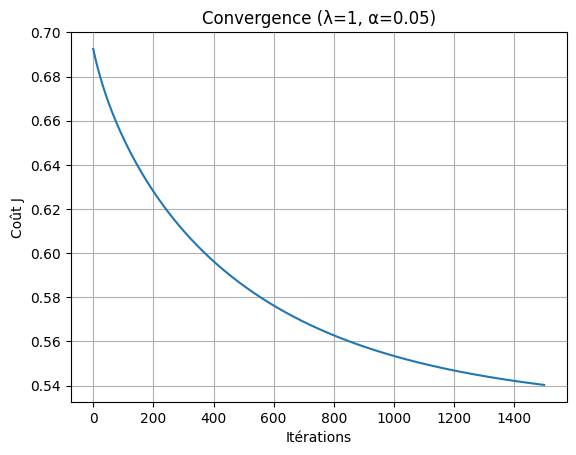

Coût final : 0.540281
Paramètres optimisés : [ 9.07846039e-01  3.56855076e-01  8.37708863e-01 -1.44707456e+00
 -5.17757615e-01 -8.54902832e-01 -3.35433767e-03 -2.27645886e-01
 -2.27862511e-01 -1.90685466e-01 -1.09761671e+00 -5.07487889e-02
 -4.15061171e-01 -1.42420342e-01 -8.82837817e-01 -2.43919787e-01
 -1.43480955e-01 -5.59922574e-02 -1.81080986e-01 -1.71488599e-01
 -4.76469498e-01 -8.08714420e-01 -1.80073830e-03 -2.06119486e-01
 -2.22528487e-04 -2.25457585e-01 -6.75860784e-02 -8.02580984e-01]


In [ ]:
plt.plot(J_history)
plt.xlabel("Itérations")
plt.ylabel("Coût J")
plt.title(f"Convergence (λ={lambdaa}, α={alpha})")
plt.grid(True)
plt.show()

# 4. Affichage des résultats finaux
print(f"Coût final : {J_history[-1]:.6f}")
print(f"Paramètres optimisés : {theta.flatten()}")

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def drawCircle(X, y, theta):
    """
    Trace la frontière de décision pour un modèle de régression logistique polynomiale.

    Paramètres :
    - X : Données originales avec 2 colonnes (pas la version transformée)
    - y : Étiquettes (0 ou 1)
    - theta : Paramètres entraînés avec régression logistique
    """

    plt.figure(figsize=(10, 6))

    # Affichage des exemples
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], c='blue', marker='o', label='Commercialisé (y=1)')
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], c='red', marker='x', label='Non-commercialisé (y=0)')

    # Création d'une grille de points
    u = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
    v = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 100)
    U, V = np.meshgrid(u, v)

    Z = np.zeros(U.shape)

    for i in range(len(u)):
        for j in range(len(v)):
            point = np.array([[1, U[i, j], V[i, j]]])  # Ajout du biais
            point_mapped = mapping(point)
            Z[i, j] = Sigmoid(point_mapped @ theta)

    # Tracer la frontière de décision à 0.5
    plt.contour(U, V, Z, levels=[0.5], colors='green', linewidths=2)

    plt.xlabel('Score Test 1')
    plt.ylabel('Score Test 2')
    plt.title('Frontière de Décision - Régression Logistique Polynomiale')
    plt.legend()
    plt.grid(True)
    plt.show()


<ipython-input-18-1a08c2570340>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = Sigmoid(point_mapped @ theta)


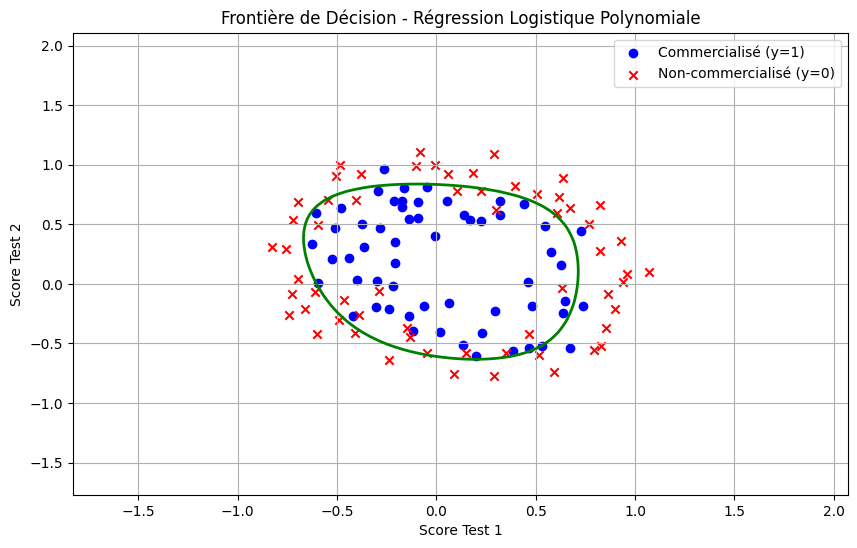

In [ ]:
# X[:, 1:3] car tu veux les deux colonnes originales (sans le biais)
drawCircle(X[:, 1:3], y, theta)


# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X, theta, threshold=0.5):
    """
    Prédit les classes (0 ou 1) pour une entrée X donnée et des paramètres theta.

    Paramètres :
    - X : ndarray (m, n) - Données d'entrée (déjà mappées si transformation polynomiale)
    - theta : ndarray (n, 1) - Paramètres du modèle
    - threshold : float - Seuil de décision (par défaut 0.5)

    Retourne :
    - y_pred : ndarray (m, 1) - Prédictions 0 ou 1
    """
    probs = Sigmoid(X @ theta)
    return (probs >= threshold).astype(int)


In [ ]:
y_pred = predict(X2, theta)  # X2 est la version mappée de X
accuracy = np.mean(y_pred == y) * 100
print(f"Précision du modèle : {accuracy:.2f}%")


Précision du modèle : 82.20%


# Affichage
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'x 2')

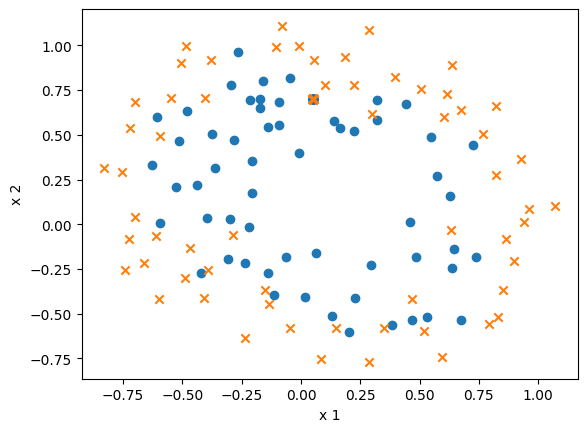

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

Traçage du coût en fonction de theta0 et theta1

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plotCostSurface(X, y, fixed_theta, theta0_range, theta1_range, index0=0, index1=1, lambdaa=1):
    """
    Trace la surface de la fonction coût par rapport à theta0 et theta1 (les deux premiers paramètres).

    Paramètres :
    - X : ndarray (m, n) - Données d'entrée (mappées)
    - y : ndarray (m, 1) - Labels
    - fixed_theta : ndarray (n, 1) - Valeurs initiales de theta, les autres paramètres sont fixés
    - theta0_range : tuple (min, max) - Intervalle pour theta0
    - theta1_range : tuple (min, max) - Intervalle pour theta1
    - index0, index1 : indices des paramètres à varier (par défaut 0 et 1)
    - lambdaa : float - Paramètre de régularisation
    """
    t0_vals = np.linspace(theta0_range[0], theta0_range[1], 100)
    t1_vals = np.linspace(theta1_range[0], theta1_range[1], 100)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)
    J_vals = np.zeros_like(T0)

    for i in range(len(t0_vals)):
        for j in range(len(t1_vals)):
            theta_temp = fixed_theta.copy()
            theta_temp[index0] = T0[i, j]
            theta_temp[index1] = T1[i, j]
            J_vals[i, j] = computeCostReg(X, y, theta_temp)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T0, T1, J_vals, cmap='viridis')
    ax.set_xlabel(f'Theta {index0}')
    ax.set_ylabel(f'Theta {index1}')
    ax.set_zlabel('Coût J(θ)')
    ax.set_title('Surface du coût J(θ0, θ1)')
    plt.show()


<ipython-input-23-e307ba721cfe>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_vals[i, j] = computeCostReg(X, y, theta_temp)


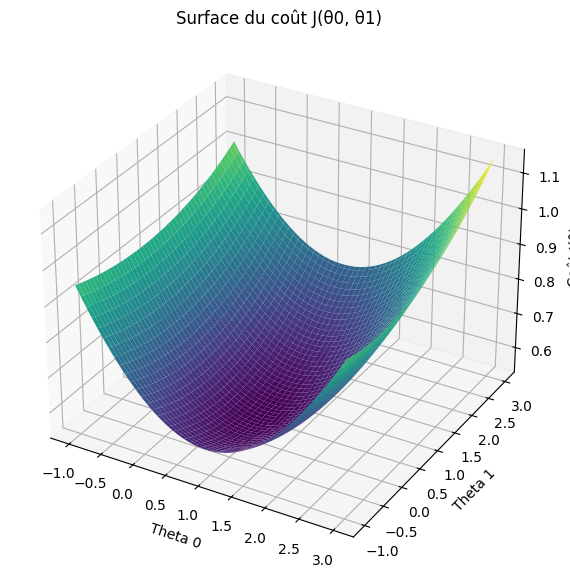

In [ ]:
plotCostSurface(X2, y, theta, theta0_range=(-1, 3), theta1_range=(-1, 3), index0=0, index1=1, lambdaa=lambdaa)


# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X2,theta)
prcision = np.mean(y==y_pred)*100
prcision

np.float64(82.20338983050848)

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Réentraîner ton modèle avec ton implémentation
theta_custom, _ = gradientDescent(X2, y, theta, alpha, iterations)

# 2. Prédictions de ton modèle
y_pred_custom = predict(X2, theta_custom)
acc_custom = accuracy_score(y, y_pred_custom)
print(f"🔧 Précision de ton modèle : {acc_custom*100:.2f}%")

# 3. Créer un modèle LogisticRegression de scikit-learn (avec régularisation L2 )
clf = LogisticRegression(penalty='l2', C=1/lambdaa, max_iter=10000, solver='lbfgs')
clf.fit(X2, y.ravel())  # Attention à .ravel() pour mettre y en 1D

# 4. Prédictions avec scikit-learn
y_pred_sklearn = clf.predict(X2)
acc_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"⚙️ Précision du modèle scikit-learn : {acc_sklearn*100:.2f}%")


Itération 0: Coût J = 0.540264
Itération 200: Coût J = 0.537369
Itération 400: Coût J = 0.535252
Itération 600: Coût J = 0.533694
Itération 800: Coût J = 0.532539
Itération 1000: Coût J = 0.531680
Itération 1200: Coût J = 0.531036
Itération 1400: Coût J = 0.530553
Itération 1499: Coût J = 0.530359
🔧 Précision de ton modèle : 83.05%
⚙️ Précision du modèle scikit-learn : 83.05%


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
# paramètres
iterations = 20000;
alpha = 0.01;

# paramètre de regression
lambdaa = 0.01;

# Appel
theta, J_history = gradientDescent(X2, y, theta, alpha, iterations);

Itération 0: Coût J = 0.476591
Itération 200: Coût J = 0.474164
Itération 400: Coût J = 0.471868
Itération 600: Coût J = 0.469662
Itération 800: Coût J = 0.467528
Itération 1000: Coût J = 0.465459
Itération 1200: Coût J = 0.463450
Itération 1400: Coût J = 0.461499
Itération 1600: Coût J = 0.459602
Itération 1800: Coût J = 0.457757
Itération 2000: Coût J = 0.455961
Itération 2200: Coût J = 0.454213
Itération 2400: Coût J = 0.452511
Itération 2600: Coût J = 0.450853
Itération 2800: Coût J = 0.449237
Itération 3000: Coût J = 0.447661
Itération 3200: Coût J = 0.446125
Itération 3400: Coût J = 0.444626
Itération 3600: Coût J = 0.443163
Itération 3800: Coût J = 0.441736
Itération 4000: Coût J = 0.440342
Itération 4200: Coût J = 0.438980
Itération 4400: Coût J = 0.437650
Itération 4600: Coût J = 0.436351
Itération 4800: Coût J = 0.435080
Itération 5000: Coût J = 0.433838
Itération 5200: Coût J = 0.432624
Itération 5400: Coût J = 0.431436
Itération 5600: Coût J = 0.430273
Itération 5800: Coût 

In [ ]:
y_pred = predict(X2, theta)  # X2 est la version mappée de X
accuracy = np.mean(y_pred == y) * 100
print(f"Précision du modèle : {accuracy:.2f}%")

Précision du modèle : 83.05%


# **TP 5**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from scipy import optimize
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 12)

# DATA

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [ ]:
from sklearn.model_selection import train_test_split

# Split initial (train + temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp en validation et test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (70, 3) (70,)
Val: (24, 3) (24,)
Test: (24, 3) (24,)


Text(0, 0.5, 'x 2')

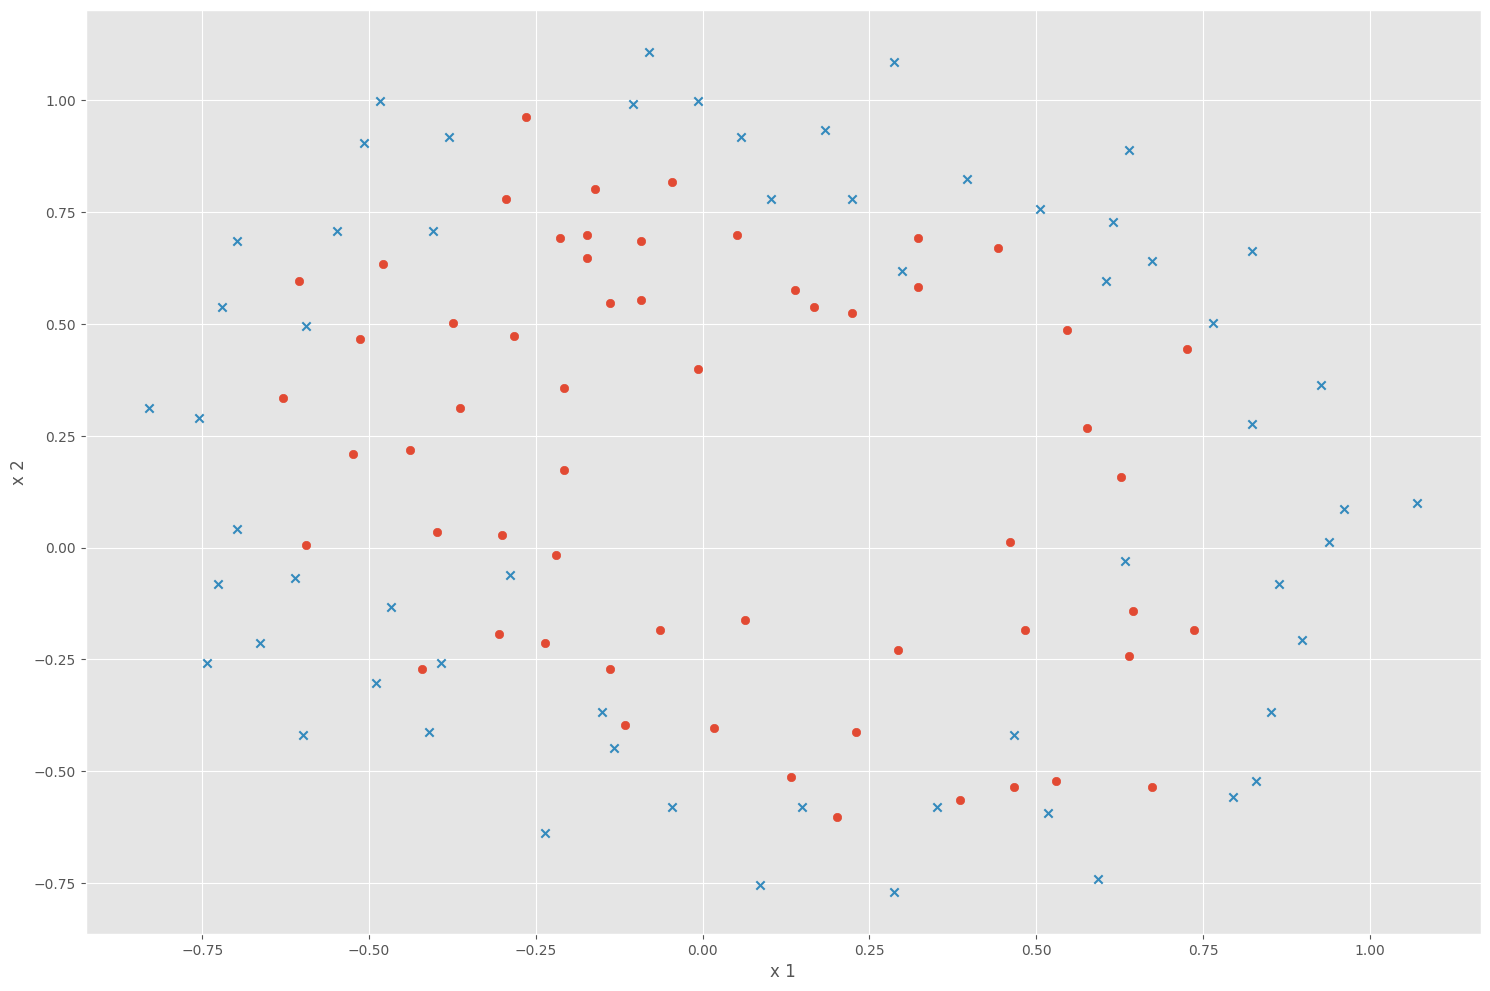

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

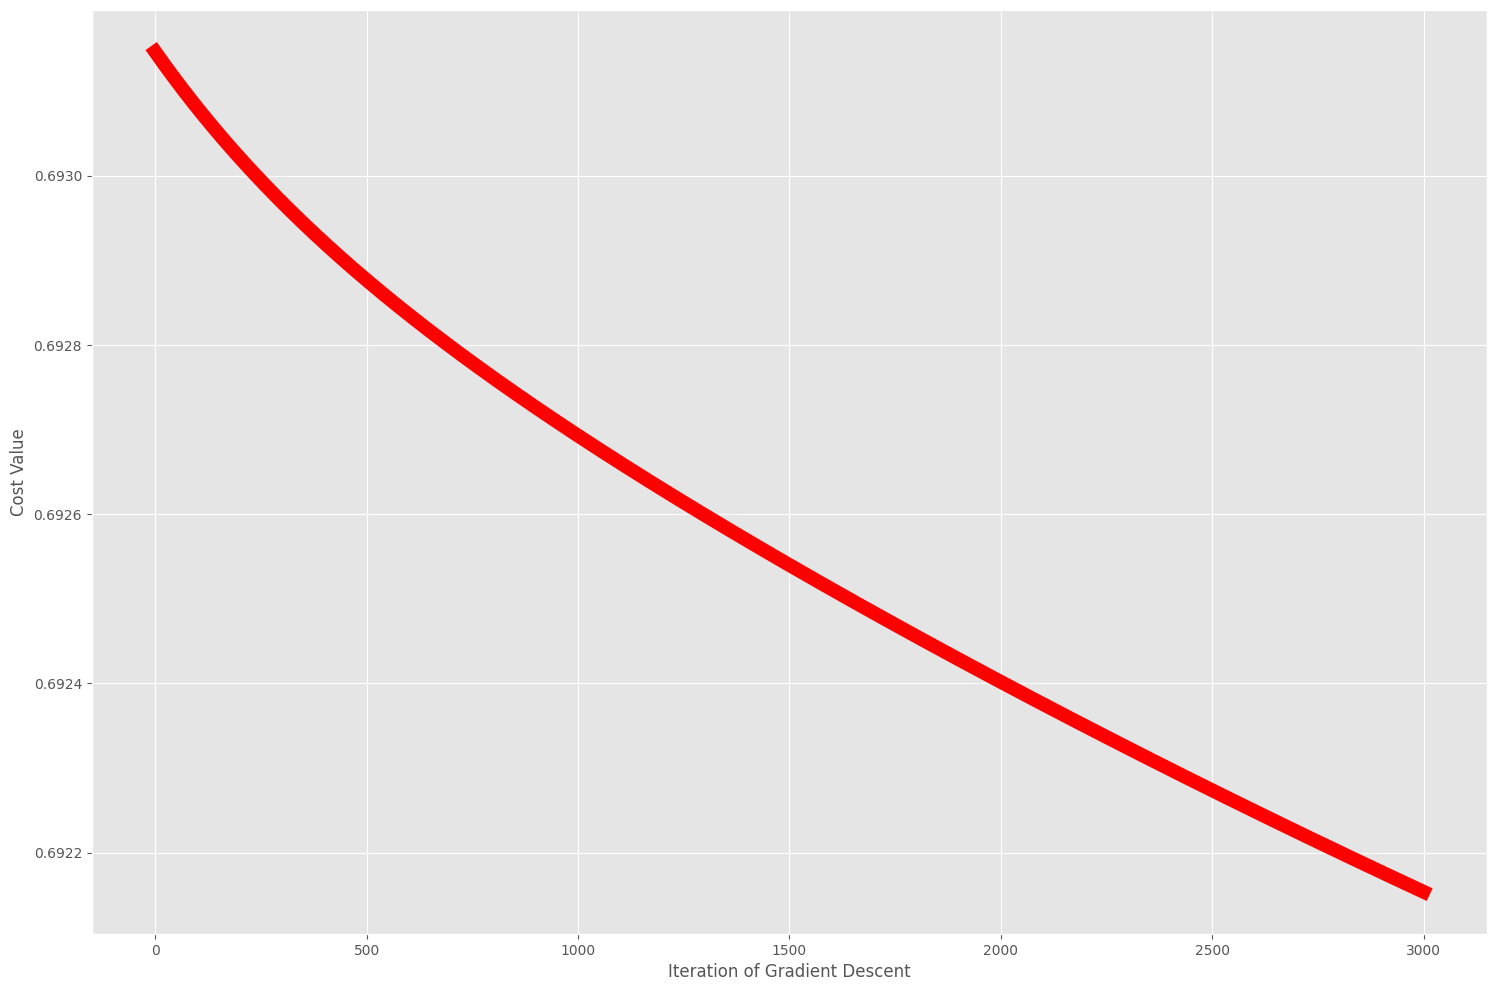

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history, linewidth=10, c='r')
plt.ylabel('Cost Value')
plt.xlabel('Iteration of Gradient Descent')
plt.show()

In [ ]:
def learningCurve(X, y, Xval, yval, lamda):
    m = X.shape[0]  # Nombre d'exemples d'entraînement
    initial_theta = np.ones((X.shape[1], 1))  # Initialisation de theta
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))

    for i in range(m):
        # Réentraînement avec les i+1 premiers exemples
        theta = gradientDescent(X[0:i+1], y[0:i+1], initial_theta, 0.001, 3000, lamda)[0]

        # Calcul des erreurs SANS régularisation (lambda=0)
        error_train[i] = computeCostReg(theta, X[0:i+1], y[0:i+1], lamda=0)
        error_val[i] = computeCostReg(theta, Xval, yval, lamda=0)

    return error_train, error_val


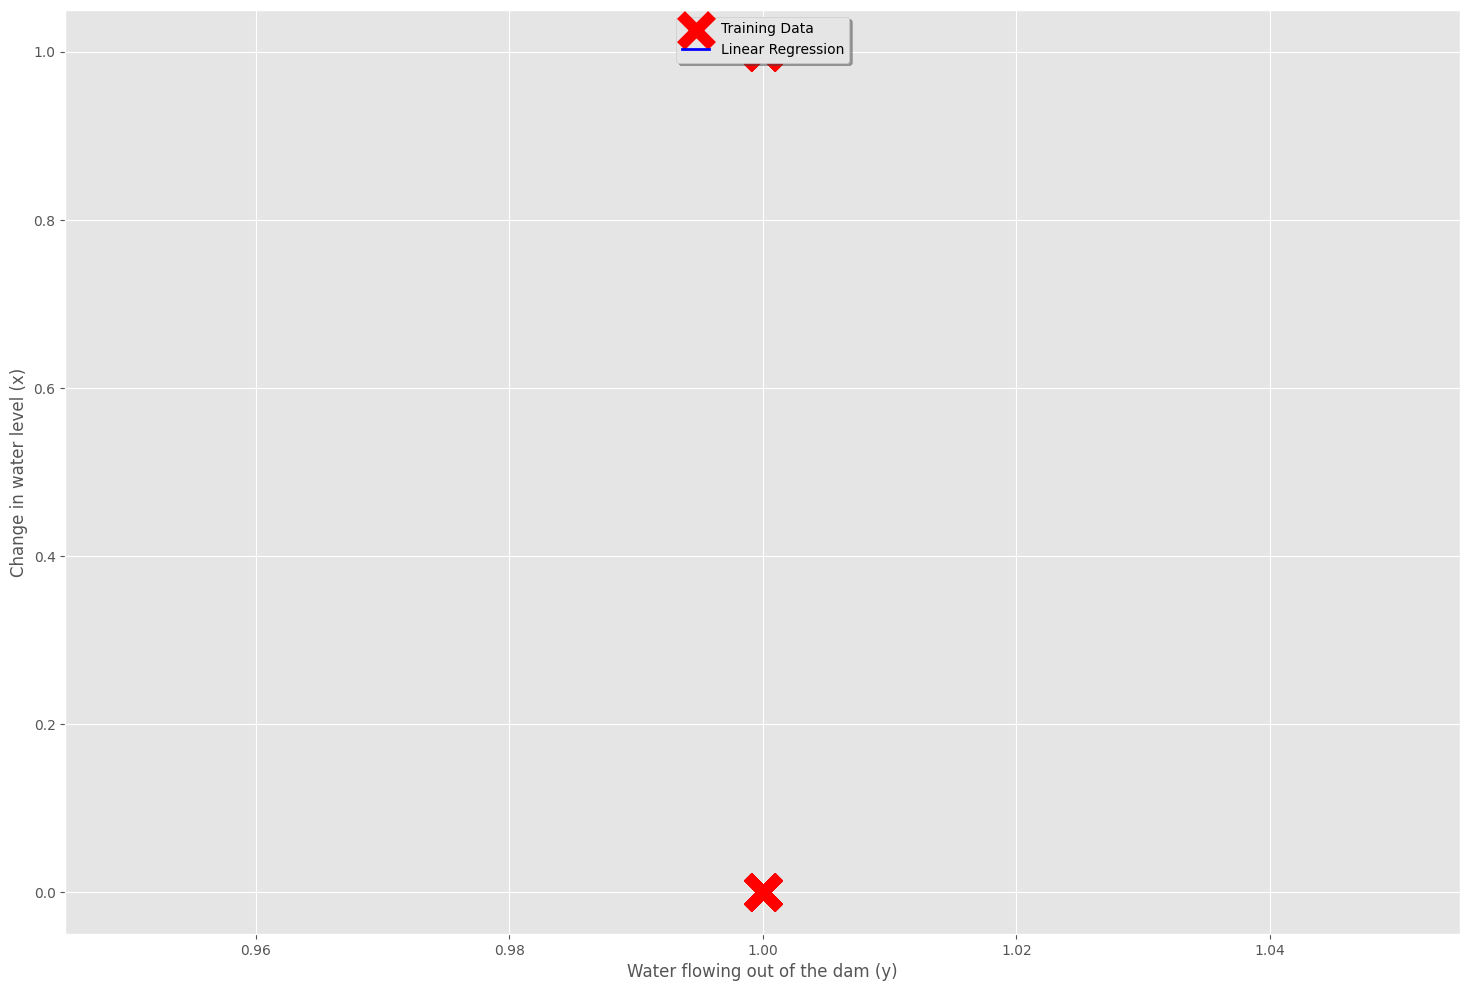

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the following variables are already initialized:
# X: input data matrix, with the first column being the bias term and remaining columns being features
# y: target values
# theta: learned parameters from gradient descent

# Prepare for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Scatter plot of training data
ax.scatter(X[:, 1], y, s=500, marker='x', color='r', linewidths=8, label='Training Data')

# Generate a range of values for the first feature based on the range of X[:, 1]
x_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)  # 100 points between min and max of X[:, 1]

# Add bias term to x_range
X_range_with_bias = np.c_[np.ones(x_range.shape[0]), x_range]  # Add a bias term (column of ones)

# Now calculate the predictions for each value in x_range
y_range = np.matmul(X_range_with_bias, theta[:2])  # Use the first two parameters (theta[0] and theta[1])

# Plot the regression line
ax.plot(x_range, y_range, linestyle='-', label='Linear Regression', linewidth=2, c='b')

# Set labels and legend
ax.legend(loc='upper center', shadow=True)
plt.xlabel('Water flowing out of the dam (y)')
plt.ylabel('Change in water level (x)')
plt.show()
